**Motion with gravity in 3D with Euler method**

Solution provided by Vania Vellucci.

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import mpl_toolkits.mplot3d.axes3d as p3
import numpy as np
import time
import math as m

**Inizializzazione dati iniziali**

In [ ]:
g = 9.81

r0 = np.array([0,0,20])      #m
v0 = np.array([5,5,10])  #m/s
a = np.array([0,0,-g])    #m/s^2
dt = 0.1  #s

while True:
 z = np.array([float(s) for s in input("inserire x0 y0 z0 (in m) con z:").split()])
 if z.size != 3 : break 
 r0 = z
 if(r0[2]>0): break

while True:
 z = np.array([float(s) for s in input("inserire vx0 vy0 vz0 (in m/s):").split()])
 if z.size != 3 : break 
 v0 = z 
 if(v0[2]>0): break


inserire x0 y0 z0 (in m):-2 -2 -2


**Implementazione Eulero**

In [5]:
def move(r,v,dt):
    vp = v + a*dt
    rp = r + v*dt
    return rp,vp

**Integrazione**

In [6]:
r = r0
v = v0
pos = []
pos.append(r0)
while r[2]>=0:
    (r,v) = move(r,v,dt)
    pos.append(r)
dz = np.array([pos[k][2] - (r0[2] + v0[2]*k*dt - 0.5*g*k*dt*k*dt) for k in range(0,len(pos))])

**Confronto con la traiettoria analitica**

<IPython.core.display.Javascript object>


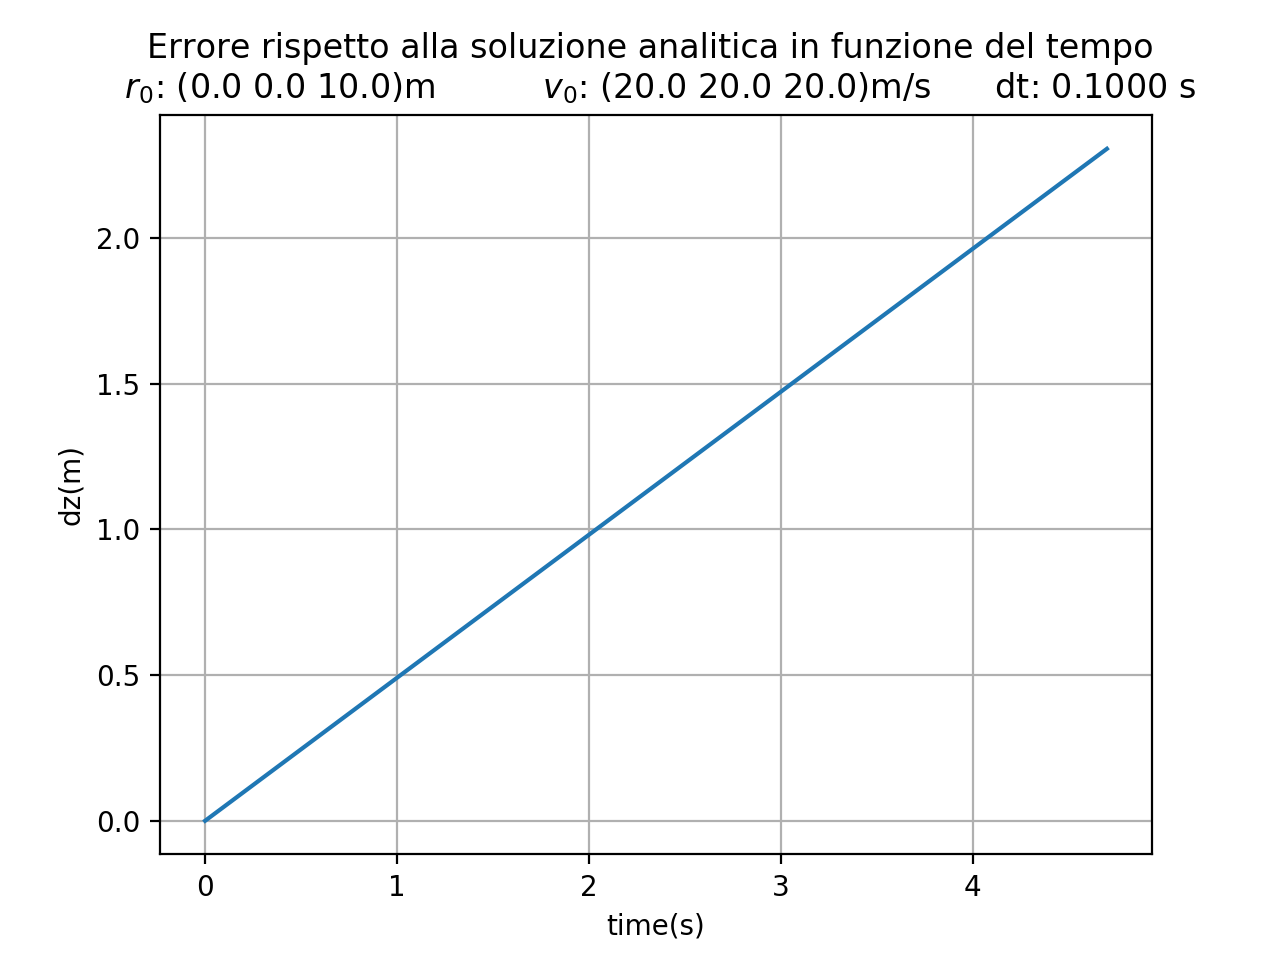

Text(0.5, 1.0, 'Errore rispetto alla soluzione analitica in funzione del tempo \n $r_0$: (0.0 0.0 10.0)m \t $v_0$: (20.0 20.0 20.0)m/s \t dt: 0.1000 s ')

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
times = [k*dt for k in range(0,len(dz))]
ax.plot(times,dz)
ax.grid()
ax.set_xlabel('time(s)')
ax.set_ylabel('dz(m)')
plt.title("Errore rispetto alla soluzione analitica in funzione del tempo \n $r_0$: (%.1f %.1f %.1f)m \t $v_0$: (%.1f %.1f %.1f)m/s \t dt: %.4f s "%(r0[0],r0[1],r0[2],v0[0],v0[1],v0[2],dt))

**Dictionary traiettoria**

In [8]:
p1 = np.array(pos)
p2 = np.array([r0 + v0*k*dt + 0.5*a*k*dt*k*dt for k in range(0,len(pos))])                           
dict = {k*dt : np.linalg.norm(p1[k]-p2[k]) for k in range(0,len(pos))}

**Traiettoria 3D del moto**

<IPython.core.display.Javascript object>


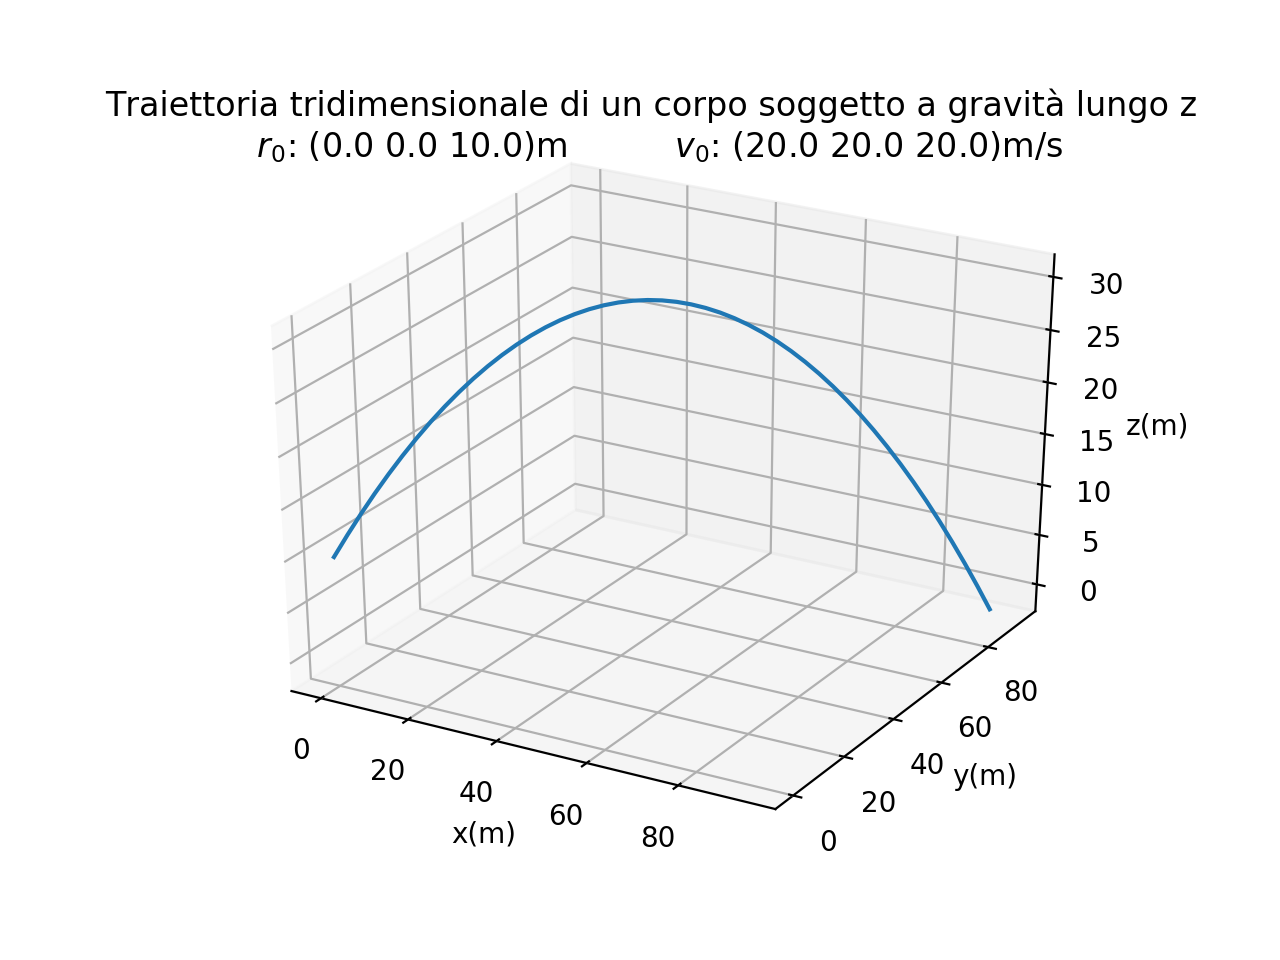

Text(0.5, 0.92, 'Traiettoria tridimensionale di un corpo soggetto a gravità lungo z \n $r_0$: (0.0 0.0 10.0)m \t $v_0$: (20.0 20.0 20.0)m/s ')

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot(p1[:,0], p1[:,1], p1[:,2])
ax.set_xlabel('x(m)')
ax.set_ylabel('y(m)')
ax.set_zlabel('z(m)')
plt.title("Traiettoria tridimensionale di un corpo soggetto a gravità lungo z \n $r_0$: (%.1f %.1f %.1f)m \t $v_0$: (%.1f %.1f %.1f)m/s "%(r0[0],r0[1],r0[2],v0[0],v0[1],v0[2]))

**Animazione**

<IPython.core.display.Javascript object>


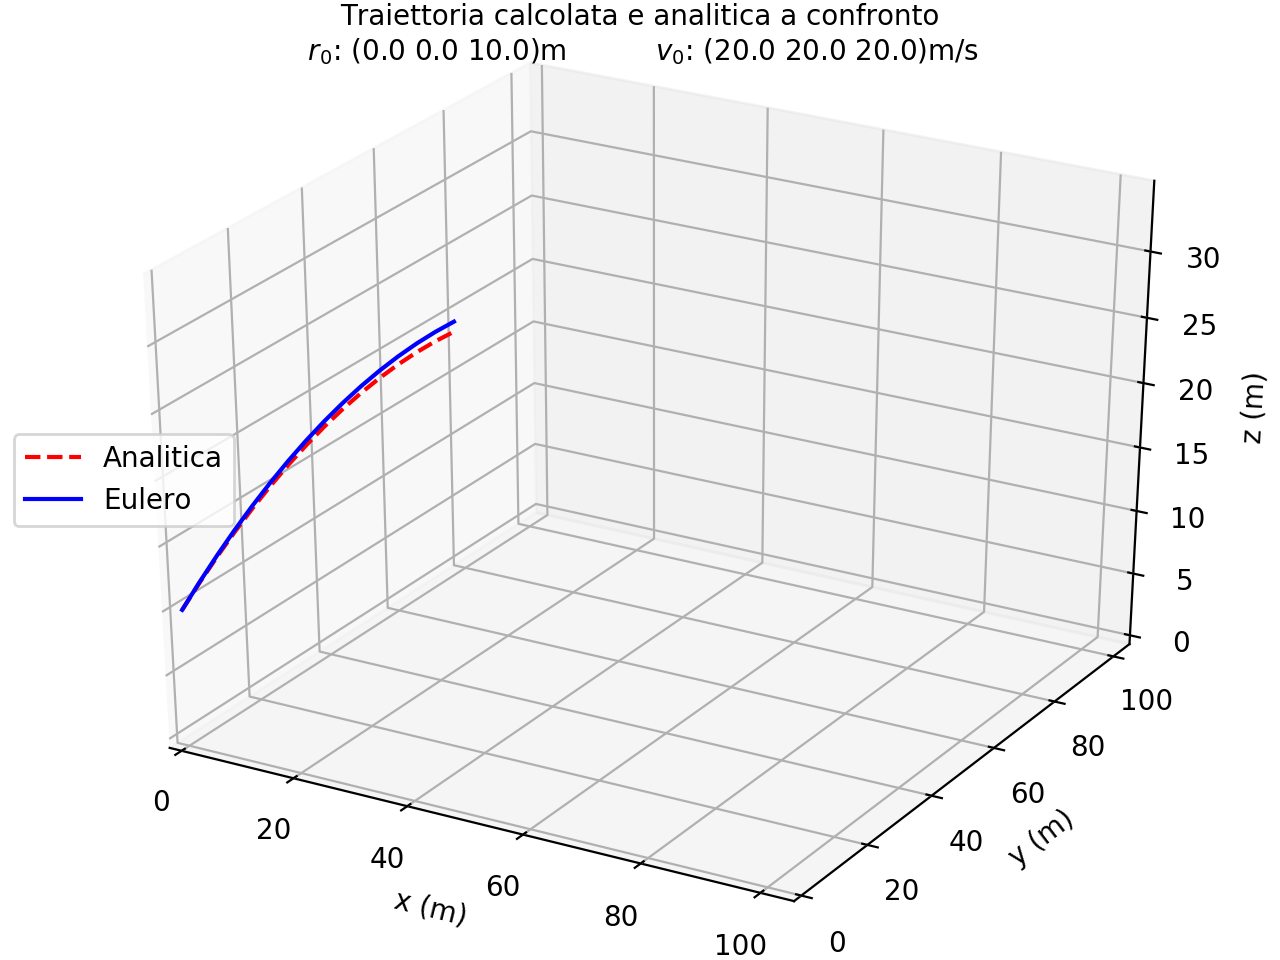

In [10]:
fig = plt.figure()
ax = p3.Axes3D(fig)

exact, = ax.plot( p2[0:1,0] ,p2[0:1,1] , p2[0:1,2], '--', markersize=5, color='red', label='Analitica')
eul, = ax.plot( p1[0:1,0] ,p1[0:1,1] , p1[0:1,2], '-',markersize=2, color='blue', label='Eulero')  

ax.set_xlim3d([0,np.amax(p1[:,0])*1.1])
ax.set_ylim3d([0,np.amax(p1[:,1])*1.1])
ax.set_zlim3d([0,np.amax(p1[:,2])*1.1])

ax.set_xlabel("x (m)")
ax.set_ylabel("y (m)")
ax.set_zlabel("z (m)")
plt.title("Traiettoria calcolata e analitica a confronto\n $r_0$: (%.1f %.1f %.1f)m \t $v_0$: (%.1f %.1f %.1f)m/s "%(r0[0],r0[1],r0[2],v0[0],v0[1],v0[2]),fontsize=10)
ax.legend(loc=6)

def animate(i):
    eul.set_data(p1[:i,0],p1[:i,1])
    eul.set_3d_properties(p1[:i,2])
    exact.set_data(p2[:i,0],p2[:i,1])
    exact.set_3d_properties(p2[:i,2])
    return exact
    

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(pos)),interval=2, blit=True, repeat=False)